# Выявление закономерностей, определяющих успешность компьютерной игры

Структура работы будет выглядеть следующим образом: исследование будет состоять из этапов, а сами этапы из шагов.
___
##### Этап I. Изучение общей информации:
* [Шаг 1. Загрузка библиотек.](#1-bullet)
* [Шаг 2. Изучение файлов с данными, получение общей информации.](#2-bullet)

##### Этап II. Предобработка данных:
* [Шаг 1. Обработка пропусков.](#3-bullet)
* [Шаг 2. Поиск и обработка ошибок в данных.](#4-bullet)
* [Шаг 3. Поиск и обработка дубликатов.](#5-bullet)
* [Шаг 4. Замена типа данных.](#6-bullet)

##### Этап III.  Исследовательский анализ данных:
* [Шаг 1. Анализ количества игр](#7-bullet)
* [Шаг 2. Анализ продаж](#8-bullet)
* [Шаг 3. Анализ игр по жанрам](#9-bullet)

##### Этап  IV. Портрет пользователя для каждого региона:
* [Шаг 1. Самые популярные платформы](#10-bullet)
* [Шаг 2. Самые популярные жанры](#11-bullet)
* [Шаг 3. Влияние ESRB на продажи в отдельном регионе](#12-bullet)

##### Этап V. Проверка гипотез:
* [Шаг 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#13-bullet)
* [Шаг 2. Средние пользовательские рейтинги жанров Action и Sports разные](#14-bullet)

#### [Общий вывод, итоги](#15-bullet)

## Этап I

### Шаг 1. Загрузка библиотек.<a id='1-bullet'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### Шаг 2. Изучение файлов с данными, получение общей информации.<a id='2-bullet'></a>

In [2]:
# Открываем файл с данными:
df = pd.read_csv('D:\games.csv')

# Выведем на экран 10 случайных строк:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9921,Cruis'n,Wii,2007.0,Racing,0.10,0.01,0.00,0.01,25.0,3.7,E
884,The Sims 3,PS3,2010.0,Simulation,0.73,0.89,0.02,0.30,78.0,6.4,T
10903,Wordmaster,DS,2008.0,Strategy,0.09,0.00,0.00,0.01,57.0,tbd,E
8539,Yu-Gi-Oh! 5D's Tag Force 6,PSP,2011.0,Strategy,0.00,0.00,0.16,0.00,NaN,NaN,NaN
15390,Robotics;Notes,X360,2012.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13309,Saiyuki: Journey West,PS,1999.0,Strategy,0.03,0.02,0.00,0.00,73.0,7.1,E
15744,Seinaru Kana: Orichalcum no Na no Motoni,PSP,2012.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14175,Challenge Me: Word Puzzles,DS,2011.0,Puzzle,0.03,0.00,0.00,0.00,NaN,tbd,E10+
2266,Street Hoops,PS2,2002.0,Sports,0.45,0.35,0.00,0.12,NaN,NaN,NaN
10631,Lode Runner 3-D,N64,1998.0,Action,0.08,0.02,0.00,0.00,NaN,NaN,NaN


In [3]:
# Выведем общую информацию о данных на экран:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Вывод

Наш датафрейм - это информация о 16715 компьютерных играх, где известно следующее:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (в млн.)
- EU_sales — продажи в Европе (в млн.)
- JP_sales — продажи в Японии (в млн.)
- Other_sales — продажи в других странах (в млн.)
- Critic_Score — оценка критиков
- User_Score — оценка пользователей
- Rating — рейтинг от организации ESRB
___
Пропущенные значения есть в столбцах:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating
___
В таблице присутствуют следующие dtypes:
- float64
- object

## Этап II

### Шаг 1. Обработка пропусков.<a id='3-bullet'></a>

In [4]:
# Приводим к нижнему регистру названия столбцов:
df.columns = df.columns.str.lower()

# Определим количество пропусков в датафрейме поочередно применив методы isna() и sum():
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Чтобы понять, что делать с пропусками предварительно взглянем на них (поочередно, по каждому столбцу в отдельности).

In [5]:
# Выведем на экран пропуски по столбцу name:
df.query('name.isna()', engine = 'python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Без имени оказались две игры на платформе GEN 1993 года. Хочу также отметить, что у данных игр отсутствует и genre (убиваем двух зайцев). Теоретически, по названию мы могли определить жанр игры, а затем ее возврастной рейтинг. В данной ситуации предлагаю удалить строки, т.к. на результат исследования это не повлияет и мы сможем убрать пропуски сразу в 2-х столбцах. 

In [6]:
df.dropna(subset = ['name'], inplace = True)

In [7]:
# Выведем на экран пропуски по столбцу year_of_release:
df.query('year_of_release.isna()', engine = 'python')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


На первый взгляд хочется сделать следующее: взять год из названия игры и прописать в столбце year_of_release. Но мы этого делать не будем, а вот почему: Madden NFL 2004, FIFA Soccer 2004, wwe Smackdown vs. Raw 2006, warhammer 40000 (взят для примера) - далеко не факт, что эти игры были выпущены именно в тот год, который указан в названии (warhammer получается релизнулся в 40000 году:)!) На примере серий игр от EA Sports: в названии игр FIFA и NBA_Live указывается следующий календарный год, а сама игра выпускается в году-1, что указан на обложке (обложка "FIFA 21", а выйдет она вот 6.10.2020 г.). И другие производители могут делать также, но опять-таки не факт. Заменять пропуски точно не будем.
___
Удалять или не удалять, вот в чем вопрос) Здесь будем отталкиваться от того, сколько полезных данных мы удалим в столбцах critic_score, user_score, rating. Выведем общую информацию по нашему срезу:

In [8]:
df.query('year_of_release.isna()', engine = 'python').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 183 to 16522
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             269 non-null    object 
 1   platform         269 non-null    object 
 2   year_of_release  0 non-null      float64
 3   genre            269 non-null    object 
 4   na_sales         269 non-null    float64
 5   eu_sales         269 non-null    float64
 6   jp_sales         269 non-null    float64
 7   other_sales      269 non-null    float64
 8   critic_score     154 non-null    float64
 9   user_score       175 non-null    object 
 10  rating           181 non-null    object 
dtypes: float64(6), object(5)
memory usage: 25.2+ KB


Если мы удалим 269 строк с пропущенными значениями в столбце year_of_release, то удалим 154 полезных значения из 8135 в critic_score, 175 из 10012 в user_score, 181 из 9947 в rating. Это около 1.8 % от каждого столбца. Удаление 269 строк в year_of_release никак не повлияет на результат исследования.

In [9]:
df.dropna(subset = ['year_of_release'], inplace = True)

Что же касается пропусков в столбцах critic_score и user_score, то здесь мы ничего заменять не будем, потому что при замене на медиану или среднее результат исследования будет сильно искажен (ведь пропусков-то немало).
___
Некоторые пропуски в столбце rating возможно мы сможем заменить, если у одной игры на разных платформах рейтинг одинаковый.

In [10]:
# Найдем самые распространенные игры:
df['name'].value_counts()

Need for Speed: Most Wanted                          12
FIFA 14                                               9
Ratatouille                                           9
LEGO Marvel Super Heroes                              9
The LEGO Movie Videogame                              8
                                                     ..
Doki-Doki Universe                                    1
Cities in Motion Collection                           1
The ICO & Shadow of the Colossus Collection           1
2 Games in 1: Sonic Pinball Party & Columns Crown     1
He-Man: Power of Grayskull                            1
Name: name, Length: 11426, dtype: int64

In [11]:
# Взглянем на срез по топ-3:
df.query('name == "Need for Speed: Most Wanted" or name == "Ratatouille" or name == "FIFA 14" or \
name == "LEGO Marvel Super Heroes"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
730,LEGO Marvel Super Heroes,X360,2013.0,Action,1.24,0.79,0.00,0.19,80.0,7.6,E10+
945,LEGO Marvel Super Heroes,PS3,2013.0,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+
1139,LEGO Marvel Super Heroes,PS4,2013.0,Action,0.59,0.76,0.01,0.26,83.0,7.7,E10+
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


Мы увидели следующую картину: у одной игры на разных платформах может быть разный возврастной рейтинг, поэтому таким способом замену пропусков не производим. Логично будет заменить в столбце rating пропуски на "Unknown".

In [12]:
df['rating'] = df['rating'].fillna('Unknown')

### Шаг 2. Поиск и обработка ошибок в данных.<a id='4-bullet'></a>

Когда мы вывели на экрна срез топ-3 самых распространенных игр, то в столбце user_score наблюдали странные значения "tbd". Найдем количество игр с таким рейтингом:

In [13]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Довольно странные значения мы встретили в user_score. Заменить на среднее или медиану мы не можем, это исказит рез-ты исследования, оптимальным вариантом будет просто заменить на None.

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None

### Шаг 3. Поиск и обработка дубликатов. <a id='5-bullet'></a>

In [15]:
# Найдём количество дубликатов (одинаковых строк) в датафрейме, применив поочередно методы duplicated() и sum():
df.duplicated().sum()

0

Отлично, дубликатов нет.

### Шаг 4. Замена типа данных. <a id='6-bullet'></a>

Изменять тип данных будем в user_score и year_of_release, т.к. тип данных не соответствует значениям, которые находятся в данных столбцах.

In [16]:
# user_score
df['user_score'] = df['user_score'].astype(float)

In [17]:
# year_of_release
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

##### Вывод

- мы привели к нижнему регистру название столбцов, избавились от пропусков в столбцах name, genre, year_of_release. А в столбцах critic_score и user_score пропуски заменять не стали, т.к. при замене на медиану или среднее результат исследования будет сильно искажен. Пропуски могут быть обусловлены ошибками при выгрузке данных, неполнотой информации об играх в открытых источниках.
- встретили в user_score странные значения 'tbd', заменять на среднее или медиану мы не стали - это исказит рез-ты исследования, просто заменили на None.
- проверили данные на наличие дубликатов - их не оказалось.
- изменили типы данных: в user_score с 'object' на 'float64', в year_of_release с 'float64' сначала на 'datetime64', а потом на 'int64'.

## Этап III

### Шаг 1. Анализ количества игр. <a id='7-bullet'></a>

In [18]:
# Найдём количество игр по годам:
count_games = df.groupby('year_of_release').agg({'name':'count'})
count_games.set_axis(['count_games'], axis = 'columns', inplace = True) 
# сделал так, потому что не менялось название линии через label в plot'е

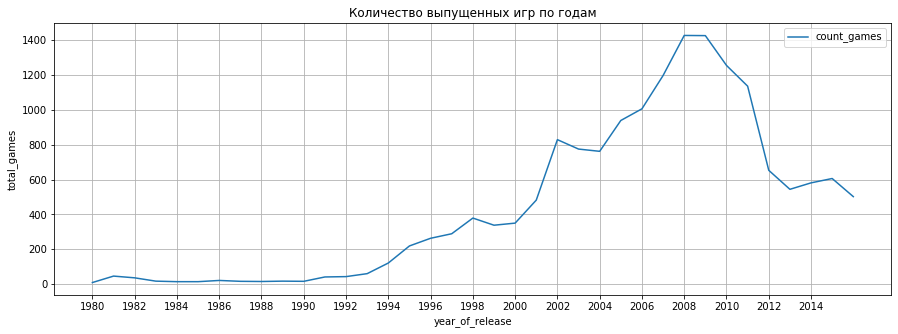

In [19]:
# Построим график:
count_games.plot(figsize=(15, 5), grid = True)
plt.xticks(np.arange(1980, 2016, step=2))
plt.ylabel('total_games')
plt.title('Количество выпущенных игр по годам');

На графике видно, что с 1980 по 1995 г. включительно выпускалось не более 200 игр. Резкий скачок вверх наблюдается с 2000 по 2002 г. (появились ps2 и xbox, возможно жесткая конкуренция поспособствовала выходу множества игр) и с 2005 по 2008 г. (появились xbox360, ps3, nintendo wii). Замедление роста игровой индустрии наблюдается с 2008 по 2009 г., затем с 2009 по 2013 г. идет резкое снижение новых игр (это объясняется появлением appstore, google play - развитием мобильных видеоигр). Потом мы видим небольшое увеличение количества игр с 2013 по 2015 г - это связано с появлением ps4 и xbox one.
___
На первый взгляд, нам будут важны данные с 2000 г., т.к. именно с него начался рост игровой индустрии (широкое распространение интернета), начали выходить консоли нового поколения, которые повлияли на развитие в будущем, начали формироваться уже более четко жанры в играх.

### Шаг 2. Анализ продаж. <a id='8-bullet'></a>

In [20]:
# Посчитаем суммарные продажи во всех регионах и запишем их в столбец total_sales:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Найдем суммы продаж за всё время по платформам и отсортируем по убыванию:
df.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending = False).head(10)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Наш топ-5 лидеров по продажам выглядит следующим образом:
1. PS2	1233.56
2. X360	961.24
3. PS3	931.34
4. Wii	891.18
5. DS	802.78

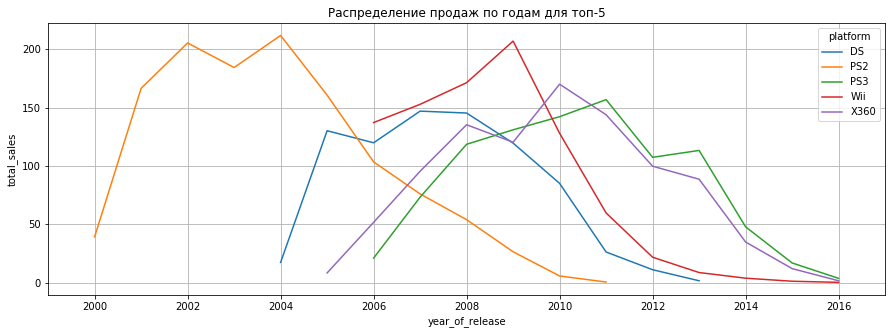

In [21]:
# Построим распределение продаж по годам для нашего топ'а:
fig, ax = plt.subplots(figsize = (15, 5))
platform = ['DS', 'X360', 'PS3', 'PS2', 'Wii']
pd.pivot_table(df.query('platform.isin(@platform)', engine = 'python'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'total_sales',
              aggfunc = 'sum').plot(ax=ax, grid = True)
plt.ylabel('total_sales')
plt.title('Распределение продаж по годам для топ-5')
plt.xlim(1999, 2017);

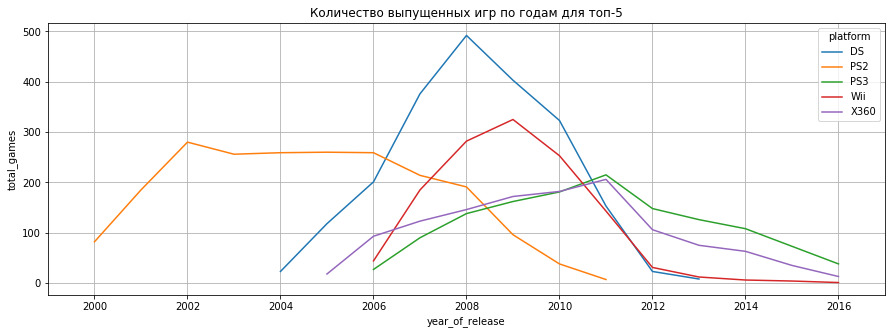

In [22]:
# Построим распределение выпущенных игр по годам для нашего топ'а:
fig, ax = plt.subplots(figsize = (15, 5))
platform = ['DS', 'X360', 'PS3', 'PS2', 'Wii']
pd.pivot_table(df.query('platform.isin(@platform)', engine = 'python'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'total_sales',
              aggfunc = 'count').plot(ax=ax, grid = True)
plt.ylabel('total_games')
plt.title('Количество выпущенных игр по годам для топ-5')
plt.xlim(1999, 2017);

В течение первых 3-х лет с момента появления новой платформы мы видим как увеличение продаж, так и увеличение количества выпущенных игр. Это может быть связано с тем, что производители игр достают "из рукавов свои козыри и заготовки" - появляется всплеск хороших и не очень игр, потребитель начинает покупать игры, которые ему "продали" еще до релиза платформы, попутно скупая еще и игры просто для того, чтобы испытать новые ощущения от игры на новой платформе. После идет снижение числа выпущенных игр и объемов продаж. Это может быть связано с тем, что в СМИ появляется информация о дате выхода новой платформы и производители игр делают "заготовки", чтобы удивить потребителя, но только уже на новой платформе. Меньше новых игр - меньше продаж.

In [23]:
# Посчитаем продолжительность жизни каждой платформы:
lifetime_platform = df.groupby('platform').agg({'year_of_release':['max','min']})
# Избавляемся от мультииндекса:
lifetime_platform.columns = lifetime_platform.columns.map(''.join)

lifetime_platform['lifetime'] = lifetime_platform['year_of_releasemax'] - lifetime_platform['year_of_releasemin']
lifetime_platform

,year_of_releasemax,year_of_releasemin,lifetime
platform,,,
2600,1989,1980,9
3DO,1995,1994,1
3DS,2016,2011,5
DC,2008,1998,10
DS,2013,1985,28
GB,2001,1988,13
GBA,2007,2000,7
GC,2007,2001,6
GEN,1994,1990,4


Перед тем как посчитать среднее lifetime, нужно убрать из таблицы строки со значением 2016 в столбце year_of_releasemax, т.к. эти платформы ещё "живут" и они исказят наш результат.

In [24]:
# Убираем ненужные строки:
lifetime_platform1 = lifetime_platform.query('year_of_releasemax != 2016')
# Найдем среднее:
lifetime_platform1['lifetime'].mean()

7.0

Получается средняя продолжительность жизни платформы 7 лет. Игровая индустрия очень динамично развивается. По графику продаж видно, что каждая платформа на пик выходит через 3-4 года после появления, а затем идет постепенное "затухание" (такую же ситуацию можно наблюдать и с выпуском игр), поэтому актуальный период для нас с 2013-2016 г.

In [25]:
# Оставим только нужное:
games = df.query('year_of_release >= 2013')
# Выясним какие платформы остались:
games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [26]:
# Посмотрим какие платформы лидируют по продажам:
games.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending = False).head(11)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


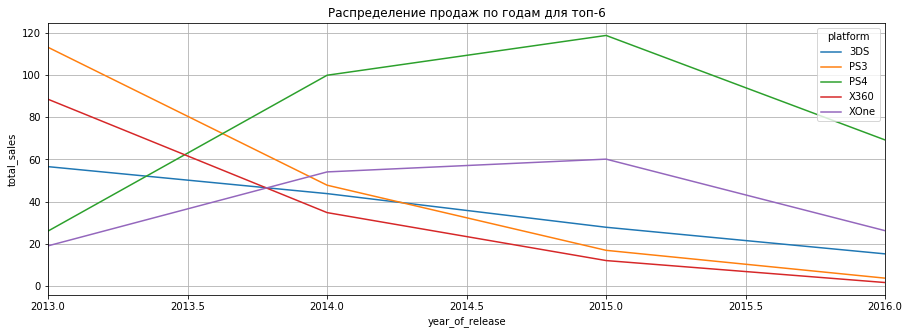

In [27]:
# Построим график, чтобы понять какие платформы растут в продажах, а какие падают (сначала для топ-5):
fig, ax = plt.subplots(figsize = (15, 5))
platform = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
pd.pivot_table(games.query('platform.isin(@platform)', engine = 'python'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'total_sales',
              aggfunc = 'sum').plot(ax=ax, grid = True)
plt.ylabel('total_sales')
plt.title('Распределение продаж по годам для топ-6')
plt.xlim(2013, 2016);

Лидерами продаж являются ps4, ps3, xone, 3ds и x360. Платформы x360 и ps3 себя уже отжили (видно на графике, продажи очень сильно просели к 2016 г.) и вышло новое поколение консолей ps4 и xone. Новые платформы потенциально интересны для нас: показали рост продаж с 2013 по 2015 г., но затем продажи снизились. Также стоит обратить внимание на nintendo 3ds, которая пытается конкурировать с ps и xbox. Все остальные платформы, которые показывают снижение продаж к 2016 г. - нам не интересны.

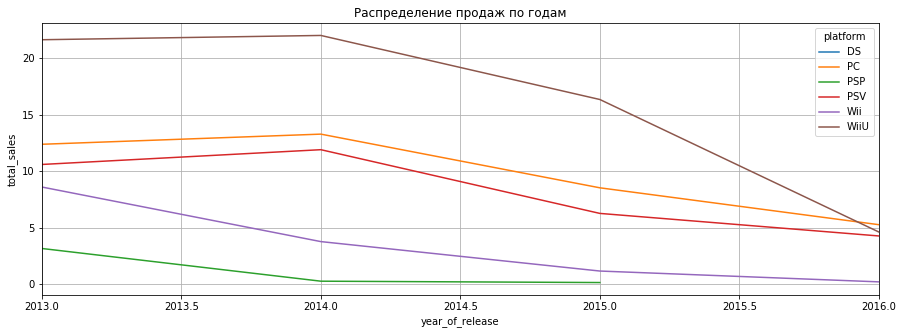

In [28]:
# Построим график, чтобы понять какие платформы растут в продажах, а какие падают (теперь для оставшихся):
fig, ax = plt.subplots(figsize = (15, 5))
platform = ['DS', 'WiiU', 'PC', 'PSP', 'PSV', 'Wii']
pd.pivot_table(games.query('platform.isin(@platform)', engine = 'python'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'total_sales',
              aggfunc = 'sum').plot(ax=ax, grid = True)
plt.ylabel('total_sales')
plt.title('Распределение продаж по годам')
plt.xlim(2013, 2016);

Какие платформы могли бы быть нам интересны здесь? Ну вот pc допустим, но сейчас всё сводится к тому, что геймдев склонен выпускать эксклюзивы (т.е. игры только для определенных платформ), на графике видно снижение продаж, мне кажется pc не является перспективной средой. Может быть WiiU? Мне кажется нет, т.к. с развитием мобильных игр, такие платформы в скором будущем сойдут на нет. Да, несомненно какой-то период после выхода был ажиотаж, но затем продажи в 2016 г. снизились до уровня продаж psv. Остальные платформы точно неперспективны и соответственно неинтересны для нас.

In [29]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) # Чтобы не вылетала ошибка при построении boxplot'а

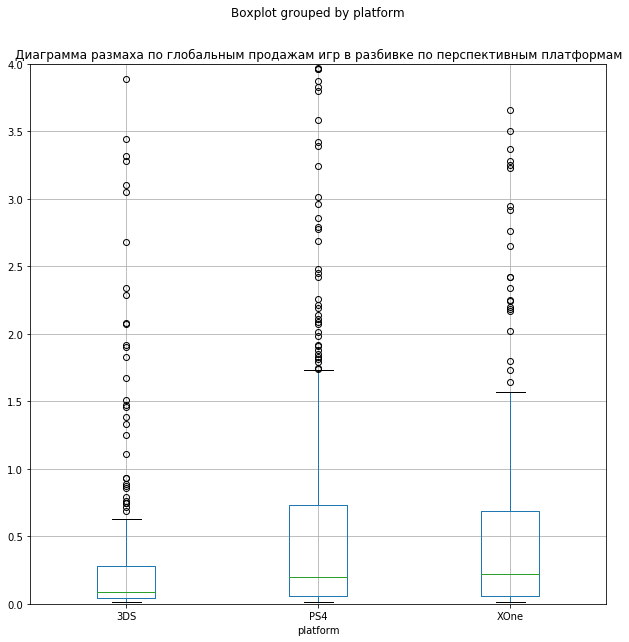

In [30]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:
promising_platform = ['PS4', 'XOne', '3DS']
games.query('platform in @promising_platform').boxplot('total_sales', by = 'platform', figsize = (10, 10))
plt.ylim(0, 4)
plt.title('Диаграмма размаха по глобальным продажам игр в разбивке по перспективным платформам');

По диаграмме размаха нетрудно заметить, что по медианным продажам лидирующую строчку занимает xbox one, на втором месте ps4, а на третьем 3ds.

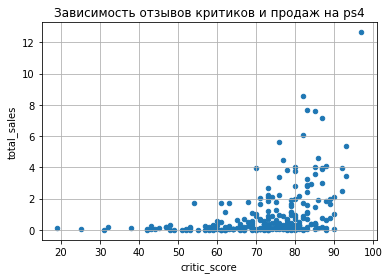

In [31]:
# Посмотрим как влияют на продажи отзывы игроков и критиков на примере ps4:
# Kритики
games.query('platform == "PS4"').plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', grid = True)
plt.title('Зависимость отзывов критиков и продаж на ps4');

Зависимость есть: чем выше оценка критиков у игры, тем лучше она продается. Но она скорее всего несильная, позже определим ее силу с помощью коэффициента корреляции.

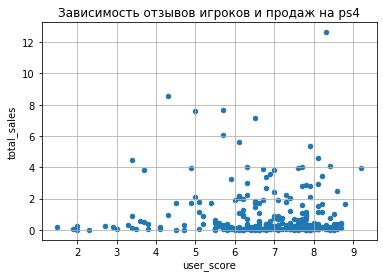

In [32]:
# Игроки
games.query('platform == "PS4"').plot(kind = 'scatter', x = 'user_score', y = 'total_sales', grid = True)
plt.title('Зависимость отзывов игроков и продаж на ps4');

Явной зависимости на графике не видно: её либо нет, либо она очень слабая.

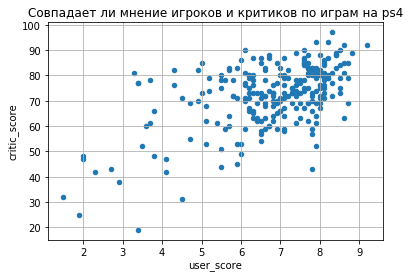

In [33]:
# Совпадает ли мнение игроков и критиков:
games.query('platform == "PS4"').plot(kind = 'scatter', x = 'user_score', y = 'critic_score', grid = True)
plt.title('Совпадает ли мнение игроков и критиков по играм на ps4');

Видим, что оценки у игроков и критиков несколько разнятся, есть значения очень разные, есть очень близкие друг к другу. В целом игры оцениваются одинаково, аномальных расхождений практически нет.

In [34]:
# найдём корреляцию:
games.query('platform == "PS4"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


Корреляция показала нам следующее:
- оценки игроков не влияют на объем продаж игр на ps4
- оценки критиков имеют небольшое влияние на продажи, чем лучше оценки - выше продажи

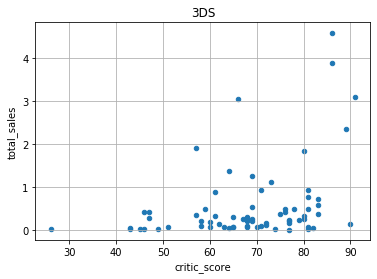

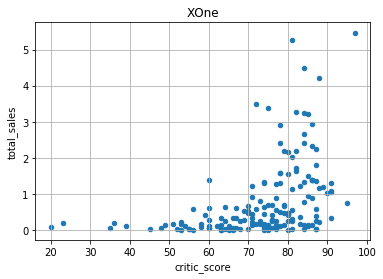

In [35]:
# Построим такие же графики и найдём корреляцию для остальных перспективных платформ:
# Критики
for platform in ['3DS', 'XOne']:
    games.query('platform == @platform').plot(kind='scatter', x = 'critic_score', y = 'total_sales', grid = True)
    plt.title(platform)

По графикам можно сказать следующее: чем выше оценки критиков, тем успешнее продается игра, но связь несильная.

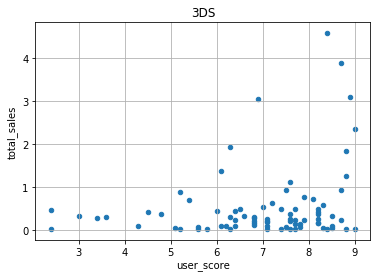

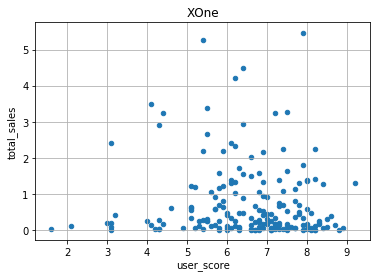

In [36]:
# Игроки
for platform in ['3DS', 'XOne']:
    games.query('platform == @platform').plot(kind='scatter', x = 'user_score', y = 'total_sales', grid = True)
    plt.title(platform)

Всё расположено на графиках несколько хаотично, на первый взгляд зависимости нет, но если приглядеться, то можно увидеть некую зависимость на графике 3ds.

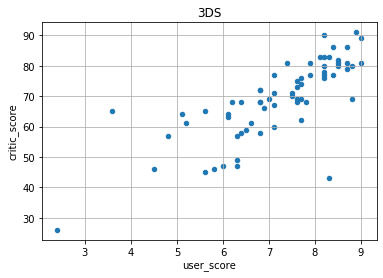

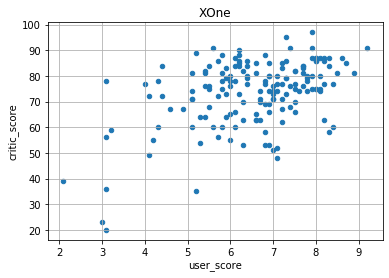

In [37]:
# Совпадает ли мнение игроков и критиков:
for platform in ['3DS', 'XOne']:
    games.query('platform == @platform').plot(kind='scatter', x = 'user_score', y = 'critic_score', grid = True)
    plt.title(platform)

Мнения игроков и критиков более идентичны на платформе 3ds(чем на ps4 тоже), на xone больше расхождений между мнениями критиков и игроков.

In [38]:
df.query('platform =="XOne"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
total_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


Наблюдаем практически такую же зависимость как и на ps4: между продажами и оценками критиков, между продажами и оценками игроков. Критики влияют на продаваемость игры, а мнения игроков, увы, нет.

In [39]:
df.query('platform =="3DS"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.099383,-0.088037,0.039475,-0.095013,0.185363,0.185538,-0.054193
na_sales,-0.099383,1.000000,0.943670,0.664840,0.991024,0.335420,0.200297,0.950142
eu_sales,-0.088037,0.943670,1.000000,0.686445,0.971201,0.309868,0.165741,0.951947
jp_sales,0.039475,0.664840,0.686445,1.000000,0.672817,0.348216,0.272660,0.852413
other_sales,-0.095013,0.991024,0.971201,0.672817,1.000000,0.322502,0.184406,0.958187
critic_score,0.185363,0.335420,0.309868,0.348216,0.322502,1.000000,0.745222,0.348740
user_score,0.185538,0.200297,0.165741,0.272660,0.184406,0.745222,1.000000,0.222078
total_sales,-0.054193,0.950142,0.951947,0.852413,0.958187,0.348740,0.222078,1.000000


На платформе 3ds оценки игроков, как ни странно, имеют больше власти над продаваемостью игр, чем на ps4 и xone. Критики также не потеряли своего влияния, но на этой платформе оно несколько меньше.

### Шаг 3. Анализ игр по жанрам. <a id='9-bullet'></a>

In [40]:
# Глянем на общее распределение игр по жанрам:
genre = df.groupby('genre').agg({'name':'count', 'total_sales':'sum'})
genre.columns = genre.columns.map(''.join)
genre.columns = ['count', 'total_sales']
genre

,count,total_sales
genre,,
Action,3307,1716.52
Adventure,1293,233.33
Fighting,837,442.66
Misc,1721,790.29
Platform,878,825.55
Puzzle,569,239.89
Racing,1226,723.49
Role-Playing,1481,931.08
Shooter,1296,1041.36


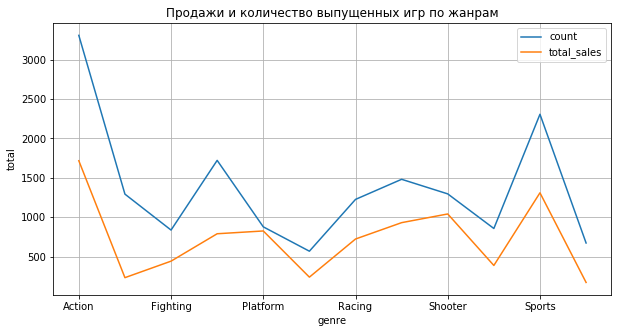

In [41]:
# Построим график:
genre.plot(figsize = (10, 5), grid = True)
plt.ylabel('total')
plt.title('Продажи и количество выпущенных игр по жанрам');

Топ-3 по количеству:
- action
- sports
- misc

Аутсайдеры: strategy и puzzle.
___
Топ-3 по продажам:
- action
- sports
- shooter

Аутсайдеры всё те же: strategy и puzzle. 
___
Самыми прибыльными жанрами оказались те, которых было больше на "рынке" и наоборот: очень мало продаж было strategy и puzzle, как и выпущенных игр.

In [42]:
# Найдём корреляцию, оценим зависимость между продажами и количеством игр:
genre.corr()

,count,total_sales
count,1.000000,0.880612
total_sales,0.880612,1.000000


corr = 0.88 говорит нам о том, что зависимость сильная, две величины коррелируют, т.е. с увеличением выпуска игр увеличивается и количество продаж.

##### Вывод

Провели анализ количества игр, выпущенных по годам. С 1980 по 1995 г. включительно выпускалось не более 200 игр. Резкий скачок вверх наблюдается с 2000 по 2002 г. и с 2005 по 2008 г. Замедление роста игровой индустрии наблюдается с 2008 по 2009 г., затем с 2009 по 2013 г. идет резкое снижение новых игр. Потом мы видим небольшое увеличение количества игр с 2013 по 2015 г - это связано с появлением ps4 и xbox one. Сначала мы решили, что будут важны данные с 2000 г., т.к. именно с него начался рост игровой индустрии (широкое распространение интернета), начали выходить консоли нового поколения, которые повлияли на развитие в будущем, начали формироваться уже более четко жанры в играх. Но после анализа продаж мы приняли решение, что актуальный период это 4 года. Выделили потенциально прибыльные и интересные платформы: ps4, 3ds, xone. Узнали, что по медианным продажам лидирующую строчку занимает xbox one, на втором месте ps4, а на третьем 3ds. Выявили следующее:
- оценка критиков влияет на объемы продаж игр, а оценки игроков нет (за исключением на 3ds)
- оценки критиков и игроков больше совпадают на 3ds. На ps4 и xone больше разных мнений.
___
Нашли по жанрам топ-3 по количеству выпущенных игр и проданных. Самыми прибыльными жанрами оказались те, которых было больше на "рынке" и наоборот: очень мало продаж было strategy и puzzle, как и выпущенных игр. При этом зависимость между количеством изданных игр и продажами довольно высокая.

## Этап IV

### Шаг 1. Самые популярные платформы. <a id='10-bullet'></a>

In [43]:
# Сгруппируем по платформам и посчитаем продажи по нужному региону, выведем на экран топ-5 по na:
pop_plat_na = df.groupby(['platform']).agg({'na_sales':'sum', 'total_sales':'sum'}) \
              .sort_values(by='na_sales', ascending=False).head()
# Посчитаем долю продаж от total_sales:
pop_plat_na['%_sales'] = pop_plat_na['na_sales'] / pop_plat_na['total_sales'] * 100
pop_plat_na

,na_sales,total_sales,%_sales
platform,,,
X360,595.74,961.24,61.976197
PS2,572.92,1233.56,46.444437
Wii,486.87,891.18,54.632061
PS3,390.13,931.34,41.889106
DS,380.31,802.78,47.374125


В Северной Америке популярны следующие платформы: X360, PS2, Wii, PS3, DS - именно на эти платформы продаётся большое количество игр. Больше половины продаж игр на X360 и Wii приходится на Северо-американский регион, также стоит отметить высокую долю продаж игр на платформы PS2, PS3, DS - более 40%!

In [44]:
# Выведем на экран топ-5 по eu:
pop_plat_eu = df.groupby(['platform']).agg({'eu_sales':'sum', 'total_sales':'sum'}) \
              .sort_values(by='eu_sales', ascending=False).head()
pop_plat_eu['%_sales'] = pop_plat_eu['eu_sales'] / pop_plat_eu['total_sales'] * 100
pop_plat_eu

,eu_sales,total_sales,%_sales
platform,,,
PS2,332.63,1233.56,26.965044
PS3,327.21,931.34,35.133249
X360,268.32,961.24,27.913944
Wii,258.32,891.18,28.986288
PS,212.39,727.58,29.191292


В Европе популярны следующие платформы: PS2, PS3, X360, Wii, PS. По продажам выделяется PS3 - в Европе продано порядка 35% от всех продаж, по остальным платформам продажи составили чуть меньше 30%.

In [45]:
# Выведем на экран топ-5 по jp:
pop_plat_jp = df.groupby(['platform']).agg({'jp_sales':'sum', 'total_sales':'sum'}) \
              .sort_values(by='jp_sales', ascending=False).head()
pop_plat_jp['%_sales'] = pop_plat_jp['jp_sales'] / pop_plat_jp['total_sales'] * 100
pop_plat_jp

,jp_sales,total_sales,%_sales
platform,,,
DS,175.02,802.78,21.801739
PS,139.78,727.58,19.211633
PS2,137.54,1233.56,11.149843
SNES,116.55,200.04,58.263347
3DS,100.62,257.81,39.028742


Страна восходящего солнца отличается своей спецификой и предпочтениями, это отразилось и на игроках) Лидирующие места по продажам занимают: DS, PS, PS2, SNES, 3DS. В лидерах платформы sony и nintendo, никакого xbox'а))) Если смотреть на цифры продаж, то можно сказать что в Японии потребление продуктов игровой индустрии меньше, чем в Европе и Сев. Америке (макс продажи 175 млн. копий, в Европе 332, Сев. Америке 595). Отметим, что 58% продаж игр на платформу SNES пришлось именно в Японии. Казалось бы кто играет на nintendo и покупает игры, да и зачем нужна эта платформа? Ответ: это всё для Японии)

### Шаг 2. Самые популярные жанры. <a id='11-bullet'></a>

In [46]:
# Сгруппируем по жанрам и посчитаем продажи по нужному региону, выведем на экран топ-5 по na:
pop_genre_na = df.groupby(['genre']).agg({'na_sales':'sum', 'total_sales':'sum'}) \
              .sort_values(by='na_sales', ascending=False).head()
# Посчитаем долю продаж от total_sales:
pop_genre_na['%_sales'] = pop_genre_na['na_sales'] / pop_genre_na['total_sales'] * 100
pop_genre_na

,na_sales,total_sales,%_sales
genre,,,
Action,863.17,1716.52,50.286044
Sports,671.20,1309.67,51.249551
Shooter,584.83,1041.36,56.160214
Platform,444.44,825.55,53.835625
Misc,399.57,790.29,50.559921


Топ-5 по жанрам в Сев. Америке: action, sports, shooter, platform, misc. Удивительно, но половина продаж по данным жанрам приходится на Сев. Америку)

In [47]:
# Выведем на экран топ-5 по eu:
pop_genre_eu = df.groupby(['genre']).agg({'eu_sales':'sum', 'total_sales':'sum'}) \
              .sort_values(by='eu_sales', ascending=False).head()
# Посчитаем долю продаж от total_sales:
pop_genre_eu['%_sales'] = pop_genre_eu['eu_sales'] / pop_genre_eu['total_sales'] * 100
pop_genre_eu

,eu_sales,total_sales,%_sales
genre,,,
Action,510.99,1716.52,29.768951
Sports,371.33,1309.67,28.352944
Shooter,314.52,1041.36,30.202812
Racing,234.49,723.49,32.410952
Misc,210.60,790.29,26.648446


Популярные жанры в Европе: action, sports, shooter, racing, misc. На Европу приходится треть продаж по данным жанрам.

In [48]:
# Выведем на экран топ-5 по jp:
pop_genre_jp = df.groupby(['genre']).agg({'jp_sales':'sum', 'total_sales':'sum'}) \
              .sort_values(by='jp_sales', ascending=False).head()
# Посчитаем долю продаж от total_sales:
pop_genre_jp['%_sales'] = pop_genre_jp['jp_sales'] / pop_genre_jp['total_sales'] * 100
pop_genre_jp

,jp_sales,total_sales,%_sales
genre,,,
Role-Playing,353.39,931.08,37.954848
Action,160.14,1716.52,9.329341
Sports,134.93,1309.67,10.302595
Platform,130.71,825.55,15.833081
Misc,107.02,790.29,13.541864


Теперь о Японии: мало покупают, соответственно и доля по жанрам будет низкая. Поп. жанры: role-playing, action, sports, platform, misc. По последним четырем доля низкая от 9 до 15%, а вот по жанру role-playing продается почти 40% от общего объема продаж по данному жанру!

### Шаг 3. Влияние ESRB на продажи в отдельном регионе.<a id='12-bullet'></a>

In [49]:
rating = df.groupby(['rating']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'total_sales':'sum'})
# AO - Только для взрослых
# E - Для всех
# E10 - Для всех от 10 лет и старше
# EC - Для детей младшего возраста
# K-A - Для детей и взрослых
# M - Для взрослых
# RP - Рейтинг ожидается
# T - Подросткам
rating

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
AO,1.26,0.61,0.00,1.96
E,1274.24,703.87,197.96,2407.61
E10+,345.50,183.35,40.20,640.98
EC,1.53,0.11,0.00,1.75
K-A,2.56,0.27,1.46,4.32
M,742.89,480.00,63.58,1462.53
RP,0.00,0.03,0.00,0.04
T,747.60,421.79,150.70,1473.08
Unknown,1225.84,609.65,836.74,2822.10


Как видно из таблицы, рейтинг игры влияет на ее продаваемость: на первом месте во всех регионах игры с рейтингом "для всех", лидирующие позиции занимают игры "подросткам", "для всех от 10 лет и старше" и "для взрослых". Если рассматривать влияние каждого рейтинга на отдельный регион, то такое отсутствует. В целом по всем регионам одна тенденция. НО! У нас что-то не так с Японией! Огромное количество игр с неизвестным рейтингом, что бы это могло значить? Можем предположить, что в Японии действует своя рейтинговая система, которая во многом отличается от общепринятой ESRB.

##### Вывод

* нашли популярные платформы по регионам. Оказалось, что в Европе и Северной Америке популярны практически одни и те же, в Японии доминирует nintendo
* выявили популярные жанры по регионам, отличий существенных нет: играют в одно и то же
* рейтинг игры не влияет на продаваемость по регионам, в целом просматривается одна тенденция: на первом месте во всех регионах игры с рейтингом "для всех", лидирующие позиции занимают игры "подросткам", "для всех от 10 лет и старше" и "для взрослых". Узнали, что в Японии верочтно своя рейтинговая система
___
Портрет NA:
- популярные платформы X360, PS2, Wii, PS3, DS
- популярные жанры action, sports, shooter, platform, misc
Этот регион является основным потребителем игр, т.к. доля продаж на этот регион по платформам и жанрам более 50%.
___
Портрет EU:
- популярные платформы PS2, PS3, X360, Wii, PS
- популярные жанры action, sports, shooter, racing, misc
В Европе и Сев. Америке популярны практически одни и те же платформы и играют они почти в одно и то же.
___
Портрет JP:
- популярные платформы DS, PS, PS2, SNES, 3DS (преобладает nintendo)
- популярные жанры role-playing, action, sports, platform, misc
Оказалось, что и в Японии играют в те же жанры, что в Европе и Сев. Америке. Т.е. предпочтения пользователей по жанрам в зависимости от региона не отличаются.

## Этап V

### Шаг 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<a id='13-bullet'></a>

Сравним дисперсии пользовательских рейтингов для платформ xone и pc. Формулируем гипотезы:

- Н0: дисперсии для платформ xone и pc равны
- Н1: дисперсии для платформ xone и pc неравны

In [50]:
# Формируем данные:
gip = df.query('user_score != "NaN"')
xone = gip.query('platform == "XOne"')
pc = gip.query('platform == "PC"')
# Критический уровень статистической значимости
alpha = .05
results = st.levene(xone['user_score'], pc['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, будем считать дисперсии равными")

p-значение: 0.2795532372785057
Не получилось отвергнуть нулевую гипотезу, будем считать дисперсии равными


Дисперсии будем считать равными, при проверке гипотезы параметр equal_var = True.

Нам нужно будет сравнить равенство двух средних по взятым выборкам, здесь будем применять метод scipy.stats.ttest_ind(). Сформулируем гипотезы:
- H0: да, средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Н1: нет, средние пользовательские рейтинги платформ Xbox One и PC неравны

In [51]:
# Критический уровень статистической значимости
alpha = .05
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = True)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги неравны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги равны")

p-значение: 1.3037979620149106e-05
Отвергаем нулевую гипотезу, рейтинги неравны


Средние пользовательские рейтинги платформ Xbox One и PC неравны.

### Шаг 2. Средние пользовательские рейтинги жанров Action и Sports разные.<a id='14-bullet'></a>

Сравним дисперсии пользовательских рейтингов для жанров action и sports. Формулируем гипотезы:

- Н0: дисперсии для жанров action и sports равны
- Н1: дисперсии для жанров action и sports неравны

In [52]:
action = gip.query('genre == "Action"')
sports = gip.query('genre == "Sports"')
# Критический уровень статистической значимости
alpha = .05
results = st.levene(action['user_score'], sports['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, дисперсии не равны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, будем считать дисперсии равными")

p-значение: 8.763985507235711e-05
Отвергаем нулевую гипотезу, дисперсии не равны


Дисперсии неравны, при проверке гипотезы параметр equal_var = False.

Нам нужно будет сравнить равенство двух средних по взятым выборкам, здесь будем применять метод scipy.stats.ttest_ind(). Сформулируем гипотезы:
- H0: нет, средние пользовательские рейтинги жанров action и sports одинаковые
- Н1: да, средние пользовательские рейтинги жанров action и sports неравны

In [53]:
# Критический уровень статистической значимости
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги неравны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги равны")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу, рейтинги равны


Средние пользовательские рейтинги жанров action и sports равны.

### Общий вывод, итоги<a id='15-bullet'></a>

Мы работали с таблицей, в которой были исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и игровых платформах. Задача исследования - выявить закономерности, которые определяют успешность компьютерной игры.
___
Сначала обработали данные:
- привели к нижнему регистру название столбцов, избавились от пропусков в столбцах name, genre, year_of_release. А в столбцах critic_score и user_score пропуски заменять не стали, т.к. при замене на медиану или среднее результат исследования будет сильно искажен.
- встретили в user_score странные значения 'tbd', заменять на среднее или медиану мы не стали - это исказит рез-ты исследования, просто заменили на None.
- проверили данные на наличие дубликатов - их не оказалось.
- изменили типы данных: в user_score с 'object' на 'float64', в year_of_release с 'float64' сначала на 'datetime64', а потом на 'int64'.
___
Провели анализ количества игр - выяснили, что рост выпуска игр отмечается с 2000 г. Нашли топ-5 лидеров по продажам среди платформ, определили средний срок жизни для платформы - 7 лет. Определили топ-3 перспективных платформы - XOne, PS4, 3DS. Узнали, что по медианным продажам лидирующую строчку занимает xbox one, на втором месте ps4, а на третьем 3ds. Выявили следующее:
- оценка критиков влияет на объемы продаж игр, а оценки игроков нет (за исключением на 3ds)
- оценки критиков и игроков больше совпадают на 3ds. На ps4 и xone больше разных мнений.
Нашли по жанрам топ-3 по количеству выпущенных игр и проданных. Самыми прибыльными жанрами оказались те, которых было больше на "рынке" и наоборот: очень мало продаж было strategy и puzzle, как и выпущенных игр. При этом зависимость между количеством изданных игр и продажами довольно высокая.
___
Сделали анализ по регионам:
* нашли популярные платформы по регионам. Оказалось, что в Европе и Северной Америке популярны практически одни и те же, в Японии доминирует nintendo
* выявили популярные жанры по регионам, отличий существенных нет: играют в одно и то же
* рейтинг игры не влияет на продаваемость по регионам, в целом просматривается одна тенденция: на первом месте во всех регионах игры с рейтингом "для всех", лидирующие позиции занимают игры "подросткам", "для всех от 10 лет и старше" и "для взрослых"
___
Проверили две гипотезы и выяснили, что:
- средние пользовательские рейтинги платформ Xbox One и PC неравны
- средние пользовательские рейтинги жанров action и sports равны
___
Что же в итоге влияет на успешность игры?
* жанр. Как показал анализ, жанр имеет большое влияние на продаваемость игр. По всем регионам жанры +/- одни и те же, лидирующие строчки также у одних и тех же жанров (за исключением Японии, там вклинился Role-Playing)
* рейтинг игры. Он тоже играет немаловажную роль. Игра должна охватывать как можно больше слоев населения, должна быть "массовой". Чем шире аудитория, тем выше вероятность более успешных продаж!
* платформа. Платформа также имеет значение. В Европе и Северной Америке преобладают xbox, ps, некоторые играют на nintendo. Здесь нужно продавать игры для первых двух платформ) В Японии же преуспевает nintendo (а мы думаем для кого вообще nintendo существует?!)
* рейтинг критиков. Игроки прислушиваются к их мнению, учитывают советы и пожелания во что стоит поиграть, а что стоит пропустить